# Data Release Tutorial for [Properties of the binary neutron star merger GW170817](https://arxiv.org/abs/1805.11579)

This notebook serves as a basic introduction to loading and viewing data released in associaton with the publication titled **Properties of the binary neutron star merger GW170817** [arXiv](https://arxiv.org/abs/1805.11579)[DCC](https://dcc.ligo.org/LIGO-P1800061/public).

The data used in these tutorials will be downloaded from the public DCC page [LIGO-P1800061](https://dcc.ligo.org/LIGO-P1800061/public).

In [1]:
public_dcc_url='https://dcc.ligo.org/public/0150/P1800061/009/'

## PSDs

We'll take a look at the noise power spectral density (PSD) for each detector first.  We'll download this and other data from the [DCC entry](https://dcc.ligo.org/LIGO-P1800061/public) using `curl`.

In [2]:
!curl -O "https://dcc.ligo.org/LIGO-P1800061/public/GW170817_PSDs.dat"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In order to read-in the data, this notebook uses `pandas` (http://pandas.pydata.org/). Other packages such as `numpy` (http://www.numpy.org/) will work as well.  We'll also use `matplotlib` (https://matplotlib.org/) for in-line figures.

In [3]:
%matplotlib inline

import pandas as pd

In [4]:
# reading the GW170817_PSDs.dat file
PSD = pd.read_table('https://dcc.ligo.org/LIGO-P1800061/public/GW170817_PSDs.dat', index_col=0, escapechar='#')

In [5]:
PSD

,LIGO_Hanford_PSD (1/Hz),LIGO_Livingston_PSD (1/Hz),Virgo_PSD (1/Hz)
Freq (Hz),,,
23.00000,3.996333e-44,2.471348e-45,2.236545e-43
23.00781,3.986623e-44,2.465266e-45,2.225027e-43
23.01562,3.976931e-44,2.459201e-45,2.210330e-43
23.02344,3.967160e-44,2.453152e-45,2.193366e-43
23.03125,3.957416e-44,2.447144e-45,2.175188e-43
...,...,...,...
2047.96900,1.281531e-45,1.017925e-45,2.737071e-44
2047.97700,1.281539e-45,1.017933e-45,2.737092e-44
2047.98400,1.281547e-45,1.017941e-45,2.737115e-44


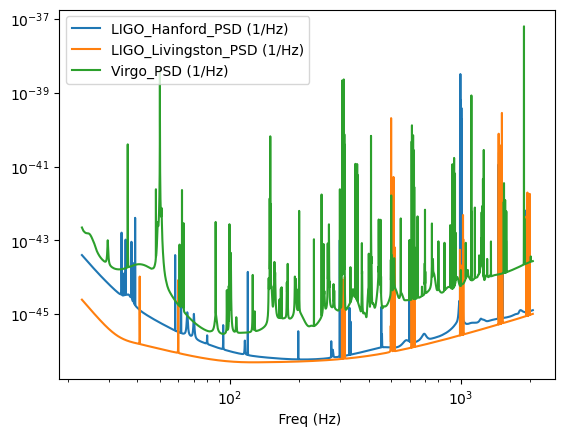

In [6]:
# plotting
PSD.plot(loglog=True);

## Posterior Samples

Now we'll download the released ten-dimensional posterior samples. The `IMRPhenomPNRT` samples are in the `high_spin_PhenomPNRT_posterior_samples.dat.gz` and `low_spin_PhenomPNRT_posterior_samples.dat.gz` files, for the "high-spin" and "low-spin" priors, respectively. (See the paper for details).

In [7]:
!curl -O "https://dcc.ligo.org/LIGO-P1800061/public/high_spin_PhenomPNRT_posterior_samples.dat.gz"
!curl -O "https://dcc.ligo.org/LIGO-P1800061/public/low_spin_PhenomPNRT_posterior_samples.dat.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [8]:
# reading the high_spin_PhenomPNRT_posterior_samples.dat.gz file
high_spin = pd.read_table('https://dcc.ligo.org/LIGO-P1800061/public/high_spin_PhenomPNRT_posterior_samples.dat.gz',
                          delim_whitespace=True)

/local/manchun.yeung@ligo.org/ipykernel_3565827/3135386925.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  high_spin = pd.read_table('https://dcc.ligo.org/LIGO-P1800061/public/high_spin_PhenomPNRT_posterior_samples.dat.gz',


In [9]:
# checking the content:
high_spin.head()

,costheta_jn,luminosity_distance_Mpc,m1_detector_frame_Msun,m2_detector_frame_Msun,lambda1,lambda2,spin1,spin2,costilt1,costilt2
0,-0.993596,47.728797,1.911550,1.010550,365.345507,99.242133,0.084102,0.129488,0.683080,0.767114
1,-0.954812,42.051751,2.339391,0.850591,19.952612,3270.621882,0.761975,0.325375,0.266637,-0.396995
2,-0.986323,44.378266,2.098759,0.931645,23.518184,907.312802,0.649165,0.004049,0.180002,-0.152065
3,-0.454467,28.789020,1.700900,1.122544,312.021073,740.124071,0.146863,0.295022,0.599691,-0.194045
4,-0.948537,43.966578,1.567364,1.211268,327.764681,779.762955,0.071833,0.148521,0.701276,-0.336068


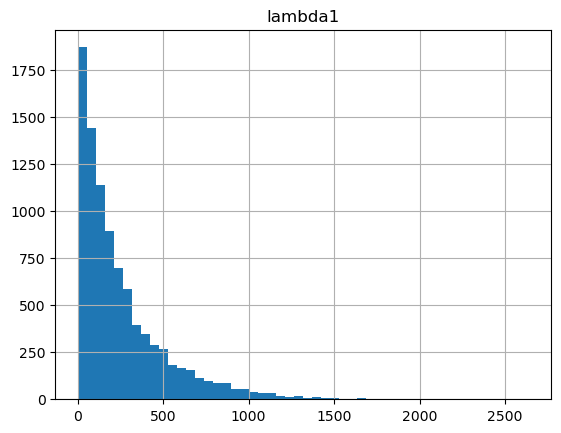

In [10]:
# 1D histogram of the "lambda1" parameter
high_spin.hist(column='lambda1', bins=50);

In [11]:
# reading the low_spin_PhenomPNRT_posterior_samples.dat.gz file
low_spin = pd.read_table('https://dcc.ligo.org/LIGO-P1800061/public/low_spin_PhenomPNRT_posterior_samples.dat.gz',delim_whitespace=True)

/local/manchun.yeung@ligo.org/ipykernel_3565827/1978200643.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  low_spin = pd.read_table('https://dcc.ligo.org/LIGO-P1800061/public/low_spin_PhenomPNRT_posterior_samples.dat.gz',delim_whitespace=True)


In [12]:
low_spin.head()

,costheta_jn,luminosity_distance_Mpc,m1_detector_frame_Msun,m2_detector_frame_Msun,lambda1,lambda2,spin1,spin2,costilt1,costilt2
0,-0.928385,46.592698,1.415062,1.337468,317.922828,688.927043,0.019260,0.000145,-0.078864,0.426047
1,-0.950661,44.958181,1.384693,1.366761,929.833080,423.998577,0.014741,0.036313,0.310979,0.089288
2,-0.655829,33.614123,1.506041,1.258329,79.826312,8.993758,0.025088,0.032998,0.063026,-0.237249
3,-0.896547,40.743386,1.494205,1.268191,736.464881,703.334173,0.039184,0.023670,0.060257,0.297033
4,-0.898358,42.934901,1.385781,1.365544,567.738176,619.811990,0.010972,0.007950,0.024044,-0.408662


Optionally to make plotting simpler, we can concatenate the "high_spin" and "low_spin" posterior data:

In [13]:
high_spin['prior'] = "high_spin"
low_spin['prior'] = "low_spin"
data = pd.concat([high_spin, low_spin])

In [14]:
q = data['m2_detector_frame_Msun']/data['m1_detector_frame_Msun']
m1 = data['m1_detector_frame_Msun']
m2 = data['m2_detector_frame_Msun']
M_chirp = (m1 * m2)**(3/5) / (m1+m2)**(1/5)

In [15]:
Lambda = data['lambda1']

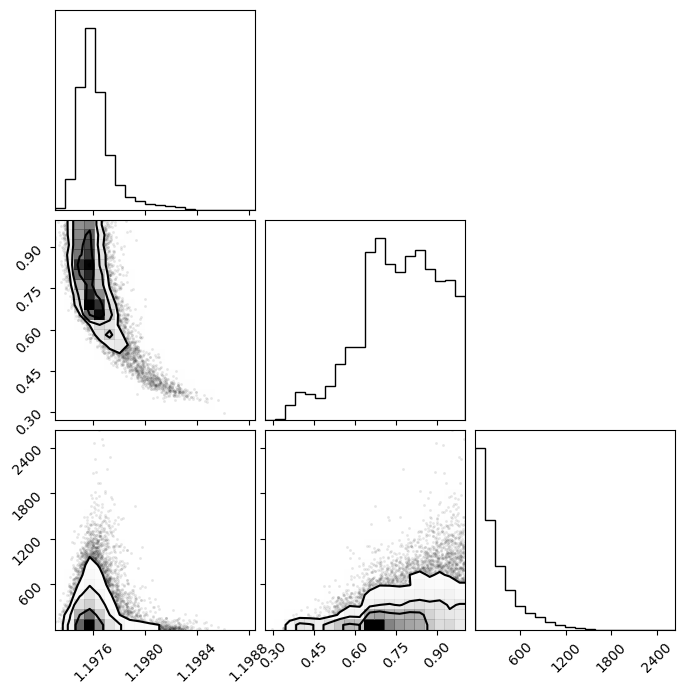

In [79]:
# unprocessed_data
import numpy as np
param = np.vstack([M_chirp, q, Lambda])
import corner
fig0 = corner.corner(param.T)

In [17]:
from scipy.stats import norm
def cdf(samples):
    sorted_samples = np.sort(samples)
    # The CDF value for each sample is its rank (number of samples <= that value) divided by the total number of samples
    cdf_values = np.arange(1, len(sorted_samples) + 1) / len(sorted_samples)

    min_val = samples.min()
    max_val = samples.max()
    
    U = np.zeros_like(samples)
    
    # Apply normalization only where theta is not min or max
    mask = (samples != min_val) & (samples != max_val)

    def find_cdf(sample_value):
        # Ensure sample_value is a numpy array for consistent processing
        sample_value = np.asarray(sample_value)
        
        # Initialize an array to hold the CDF results
        cdf_result = np.zeros_like(sample_value, dtype=float)
        
        for i, value in enumerate(sample_value):
            # Find the index where the sample value would fit in the sorted array
            index = np.searchsorted(sorted_samples, value)
            if index == 0:
                cdf_result[i] = 0.0  # If the sample value is less than the smallest sample
            elif index >= len(cdf_values):
                cdf_result[i] = 1.0  # If the sample value is greater than the largest sample
            else:
                cdf_result[i] = cdf_values[index - 1]  # Return the corresponding CDF value
                
        return cdf_result

    U[mask] = find_cdf(samples[mask])
    transformed_samples = np.zeros_like(samples)
    transformed_samples = norm.ppf(U[mask])
    return transformed_samples

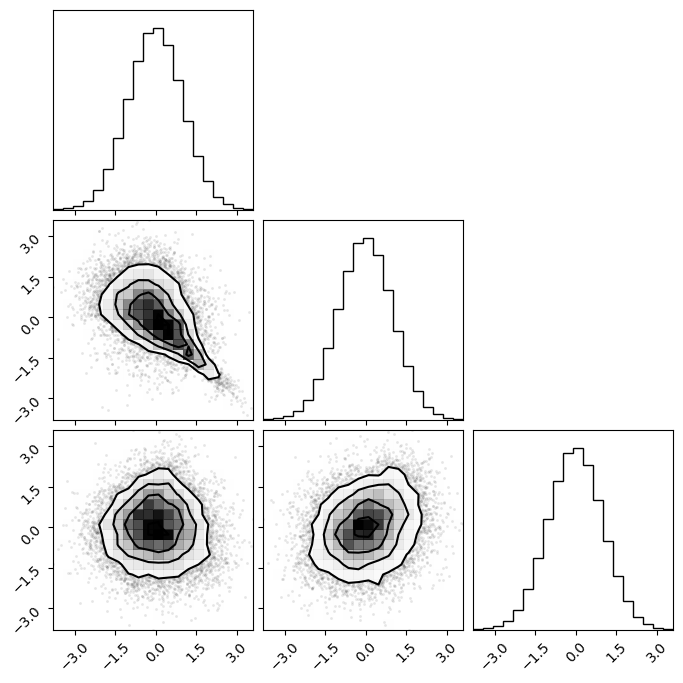

In [85]:
# processed_data
param = np.vstack([cdf(M_chirp), cdf(q), cdf(Lambda)])
fig1 = corner.corner(param.T)

In [64]:
from sklearn.mixture import GaussianMixture

k_arr = np.arange(15)+1
models = [
    GaussianMixture(n_components=k).fit(np.column_stack((M_chirp, q, Lambda)))
    for k in k_arr
]

In [65]:
logprob = []
i=0
for gmm in models:
    samples = models[i].sample(13069)[0]
    score = models[i].score(samples)
    logprob.append(score)
    i+=1

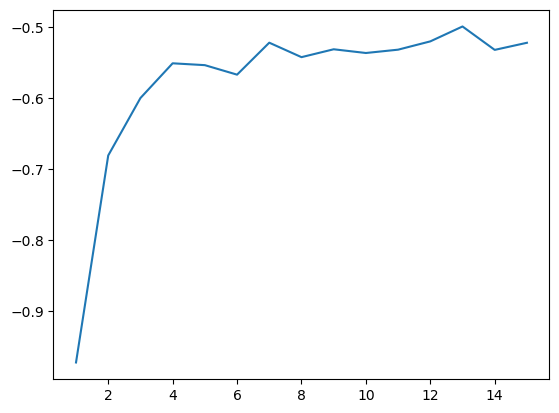

In [84]:
# log_likelihood of gmm, converge at g~10
plt.plot(k_arr, logprob)

In [77]:
gmm_data = models[14].sample(13069)[0]

In [41]:
models[1].score(models[1].sample(13069)[0])

0.3923544658280047

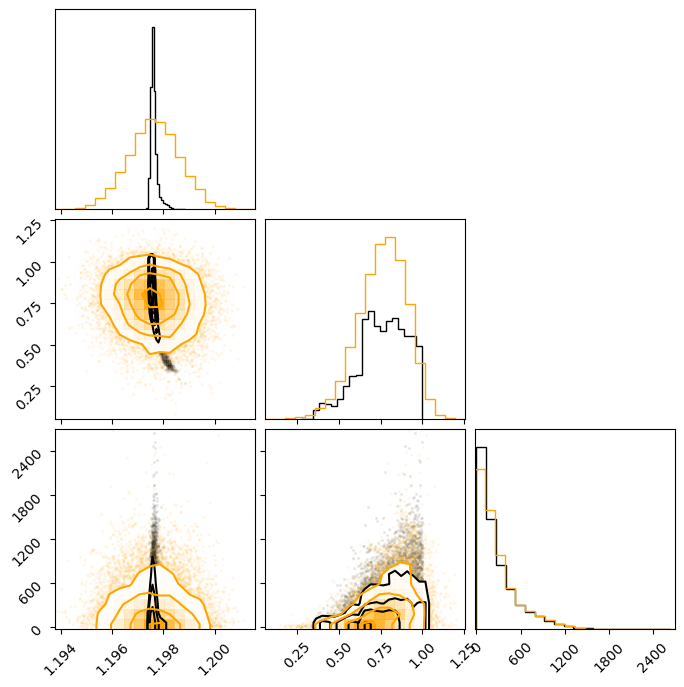

In [80]:
# unprocessed_data and gmm_data
corner.corner(gmm_data, fig=fig0, color='orange')

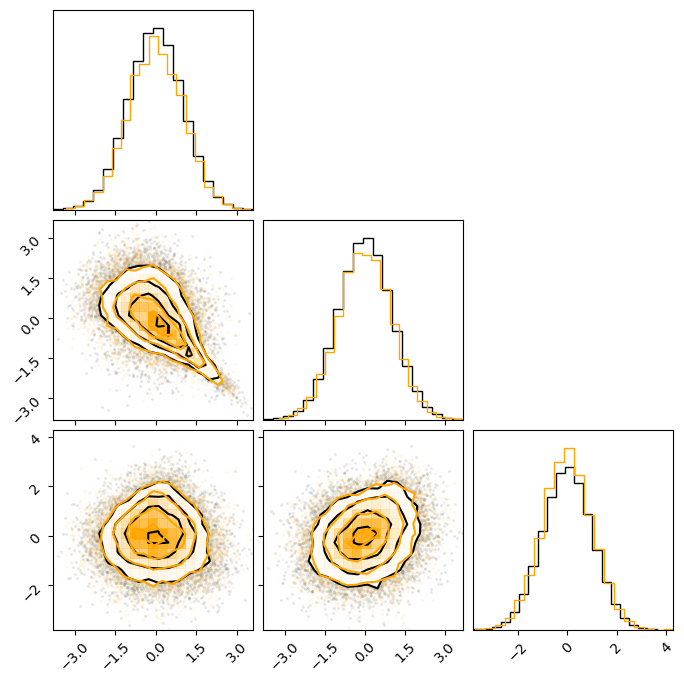

In [82]:
# processed_data and gmm_processed_data
gmm_cdf = GaussianMixture(n_components=10).fit(np.column_stack((cdf(M_chirp), cdf(q), cdf(Lambda)))).sample(13067)[0]
corner.corner(gmm_cdf, fig=fig1, color='orange')